In [21]:
import numpy as np
import matplotlib.pyplot as plt
from labfiles.utils import *
import copy
import math

%matplotlib inline

In [22]:
# loading data# load dataset
X_train, y_train = load_data("labfiles/data/ex2data1.txt")

In [23]:
# viewing data
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [24]:
# 1st five values of y
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [25]:
# checking dimenssions of variables
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


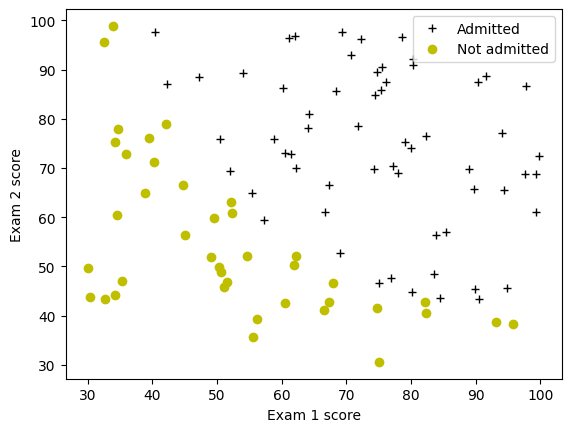

In [26]:
# visualizing the data
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    # raise NotImplementedError

In [28]:
# checking the sigmoid function
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

# for vector values
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

"""
Expected Output:
sigmoid(0) = 0.5
sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
"""

sigmoid(0) = 0.5
sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


'\nExpected Output:\nsigmoid(0) = 0.5\nsigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]\n'

In [29]:
def compute_cost(X, y, w, b, lambda_=0):
    m = len(y)
    h = sigmoid(np.dot(X, w) + b)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost
    
    raise NotImplementedError

In [30]:
# checking implementation of cost function
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

"""
Expected Output:
Cost at initial w and b (zeros): 0.693
Cost at test w and b (non-zeros): 0.218
"""

Cost at initial w and b (zeros): 0.693
Cost at test w and b (non-zeros): 0.218


'\nExpected Output:\nCost at initial w and b (zeros): 0.693\nCost at test w and b (non-zeros): 0.218\n'

In [31]:
def compute_gradient(X, y, w, b, lambda_=0):
    m = len(y)
    h = sigmoid(np.dot(X, w) + b)
    dj_dw = (1 / m) * np.dot(X.T, (h - y))
    dj_db = (1 / m) * np.sum(h - y)
    return dj_db, dj_dw

In [32]:
# checking implementation of gradient function 
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.009216589291153, -11.262842205513593]
dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.373841249539794]


In [33]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    global w, b  # Declare w and b as global variables
    
    w = w_in  # Initialize w as the input w_in
    b = b_in  # Initialize b as the input b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db              

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion 
            cost = cost_function(X, y, w, b, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history  # return w and b, J history for graphing


In [34]:
# checking implementation of gradient descent
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.96   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


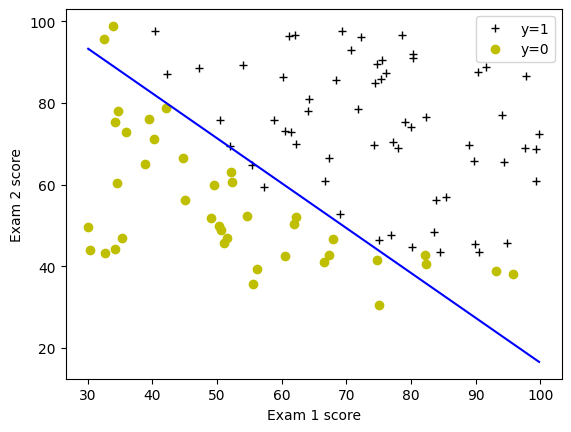

In [35]:
# plotting the decission boundry
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [36]:
def predict(X, w, b):
    h = sigmoid(np.dot(X, w) + b)
    return (h >= 0.5).astype(int)

In [37]:
# testing predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

"""
Expected Output:
Output of predict: shape (4,), value [0. 1. 1. 1.]
"""

Output of predict: shape (4,), value [0 1 1 1]


'\nExpected Output:\nOutput of predict: shape (4,), value [0. 1. 1. 1.]\n'

In [38]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
